In [73]:
import requests
import os
from dotenv import load_dotenv
import pandas as pd
import statsmodels.formula.api as smf
import seaborn as sns

load_dotenv()

True

In [74]:
API_KEY = os.getenv('API_KEY', -1)
if API_KEY == -1:
    raise('INVALID API KEY')
response = requests.get('https://api.football-data.org/v2/competitions/BSA/standings', headers={
    'X-Auth-Token': API_KEY,
})

In [75]:
response = response.json()

In [76]:
table = response['standings'][0]['table']

In [77]:
for placement in table:
    print("The {0} team is {1} with {2} wins".format(placement['position'], placement['team']['name'], placement['won']))

The 1 team is CA Mineiro with 18 wins
The 2 team is SE Palmeiras with 15 wins
The 3 team is Fortaleza EC with 14 wins
The 4 team is CR Flamengo with 14 wins
The 5 team is RB Bragantino with 11 wins
The 6 team is SC Internacional with 10 wins
The 7 team is SC Corinthians Paulista with 10 wins
The 8 team is Fluminense FC with 10 wins
The 9 team is AC Goianiense with 9 wins
The 10 team is América FC with 8 wins
The 11 team is Cuiabá EC with 7 wins
The 12 team is CA Paranaense with 10 wins
The 13 team is São Paulo FC with 7 wins
The 14 team is Ceará SC with 6 wins
The 15 team is EC Bahia with 8 wins
The 16 team is EC Juventude with 6 wins
The 17 team is Santos FC with 6 wins
The 18 team is SC Recife with 6 wins
The 19 team is Grêmio FBPA with 7 wins
The 20 team is Chapecoense AF with 1 wins


In [78]:
df = pd.DataFrame(table)

In [79]:
df['team'] = df['team'].apply(lambda x: x['name'])

In [80]:
df.columns.tolist()

['position',
 'team',
 'playedGames',
 'form',
 'won',
 'draw',
 'lost',
 'points',
 'goalsFor',
 'goalsAgainst',
 'goalDifference']

In [81]:
df['wpc'] = df['won']/df['playedGames']
df['pyth'] = df['goalsFor']**2/(df['goalsFor']**2 + df['goalsAgainst']**2)

In [82]:
df.tail()

,position,team,playedGames,form,won,draw,lost,points,goalsFor,goalsAgainst,goalDifference,wpc,pyth
15,16,EC Juventude,28,None,6,11,11,29,27,36,-9,0.214286,0.360000
16,17,Santos FC,27,None,6,11,10,29,23,34,-11,0.222222,0.313947
17,18,SC Recife,28,None,6,9,13,27,15,24,-9,0.214286,0.280899
18,19,Grêmio FBPA,26,None,7,5,14,26,23,32,-9,0.269231,0.340631
19,20,Chapecoense AF,28,None,1,10,17,13,24,49,-25,0.035714,0.193483


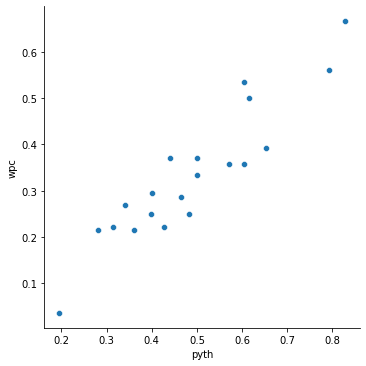

In [83]:
sns.relplot(x="pyth", y="wpc", data =df)

In [85]:
pyth_lm = smf.ols(formula = 'wpc ~ pyth', data=df).fit()
pyth_lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    wpc   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     102.2
Date:                Tue, 26 Oct 2021   Prob (F-statistic):           7.53e-09
Time:                        01:05:24   Log-Likelihood:                 29.686
No. Observations:                  20   AIC:                            -55.37
Df Residuals:                      18   BIC:                            -53.38
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0657      0.042     -1.576      0.133      -0.153       0.022
pyth           0.8205      0.081     10.111      0.000       0.650       0.991
==============================================================================
Omnibus:                        2.709   Durbin-Watson:                   1.419
Prob(Omnibus):                  0.258   Jarque-Bera (JB):                1.209
Skew:                           0.122   Prob(JB):                        0.546
Kurtosis:                       1.820   Cond. No.                         7.81
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""